If the distributions look similar or close to similar before and after imputation, then we will use random-sample-imputation otherwise won't.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Numerical column

In [25]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(10)

,Survived,Age,Fare
151,1,22.0,66.6000
614,0,35.0,8.0500
192,1,19.0,7.8542
453,1,49.0,89.1042
268,1,58.0,153.4625
818,0,43.0,6.4500
872,0,33.0,5.0000
7,0,2.0,21.0750
79,1,30.0,12.4750
770,0,24.0,9.5000


In [26]:
df.shape

(891, 3)

In [27]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [31]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [32]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [33]:
#X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [34]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,41.0
493,71.0,49.5042,71.0
527,NaN,221.7792,30.0


In [35]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,22.0
870,26.0,7.8958,26.0


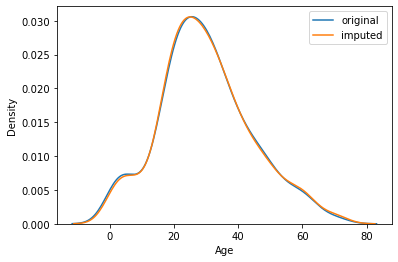

In [36]:
sns.kdeplot(X_train['Age'],label = "original")
sns.kdeplot(X_train['Age_imputed'], label = "imputed")
plt.legend()

In [37]:
print('Original variable variance: ', X_train['Age'].var())
print('Imputed variable variance: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Imputed variable variance:  206.47622561335524


In [40]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.542515
Age,71.512440,204.349513,204.349513
Age_imputed,53.542515,204.349513,206.476226


<AxesSubplot:>

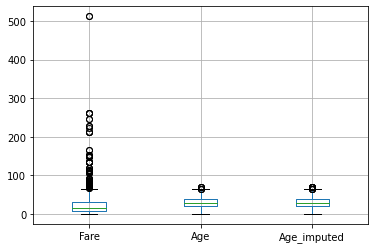

In [44]:
X_train[['Fare','Age','Age_imputed']].boxplot()

In [51]:
"""
When in production if the values generated randomly every time for a specific value, then this is not acceptable. 
To generate the same value for every observation of a specific value makes more sense.
sense. You can take help from the below line in production.
"""
#sampled_value = X_train['Age'].sample(1, random_state = int(observation['Fare']))
print()

### Categorical Column

In [156]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.sample(10)

,FireplaceQu,GarageQual,SalePrice
374,Gd,TA,219500
1366,NaN,TA,193000
199,Gd,TA,274900
1264,NaN,TA,181000
185,TA,Ex,475000
324,Gd,TA,242000
487,TA,TA,175000
1152,Gd,TA,230000
485,Gd,TA,147000
313,Gd,TA,375000


In [157]:
data.shape

(1460, 3)

In [158]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [159]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [166]:
X = data #not drop target column for future visualization
y = data['SalePrice']

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [168]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [169]:
#X_test

In [170]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\User\AppData\Local\Temp\ipykernel_10812\2056505658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\User\AppData\Local\Temp\ipykernel_10812\2056505658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\User\AppData\Local\Temp\ipykernel_10812\2056505658.py:4: SettingWithCopyWarning: 
A val

In [171]:
X_train.isnull().sum()

FireplaceQu            547
GarageQual              64
SalePrice                0
GarageQual_imputed       0
FireplaceQu_imputed      0
dtype: int64

In [172]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],axis = 1)
temp.columns = ['original','imputed']

temp

,original,imputed
TA,0.951087,0.950342
Fa,0.032609,0.032534
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.002568


In [173]:
X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna())

Gd    0.491143
TA    0.405797
Fa    0.043478
Ex    0.033816
Po    0.025765
Name: FireplaceQu, dtype: float64

In [174]:
X_train['FireplaceQu_imputed'].value_counts() / len(X_train['FireplaceQu_imputed'])

Gd    0.488870
TA    0.406678
Fa    0.043664
Ex    0.033390
Po    0.027397
Name: FireplaceQu_imputed, dtype: float64

In [175]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],axis = 1)
temp.columns = ['original','imputed']

temp

,original,imputed
Gd,0.491143,0.488870
TA,0.405797,0.406678
Fa,0.043478,0.043664
Ex,0.033816,0.033390
Po,0.025765,0.027397


For GarageQual feature as the number of missing values are less the distribution remains almost same even after imputation

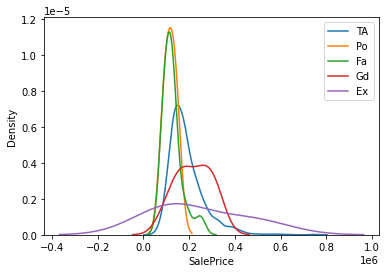

In [181]:
for category in X_train['GarageQual'].dropna().unique():
    sns.kdeplot(X_train[X_train['GarageQual'] == category]['SalePrice'],label = category)

plt.legend()
plt.show()

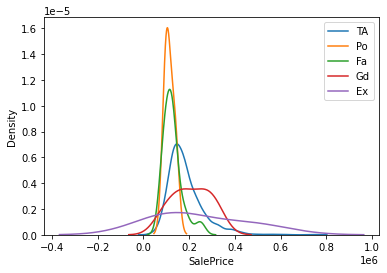

In [180]:
for category in X_train['GarageQual_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['GarageQual_imputed'] == category]['SalePrice'],label = category)

plt.legend()
plt.show()

For FireplaceQu feature as the number of missing values are higher, the distribution of categories differ after imputation

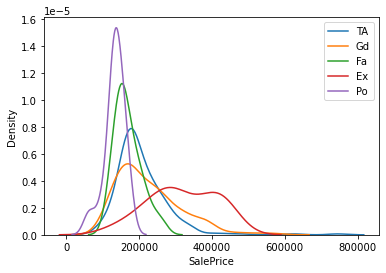

In [182]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label = category)

plt.legend()
plt.show()

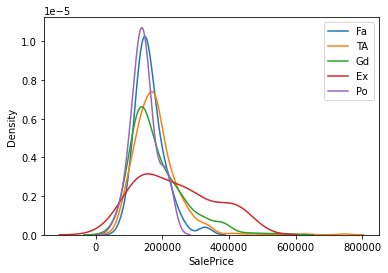

In [183]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label = category)

plt.legend()
plt.show()

In [188]:
#Using a function 
def eda(var):
    for category in X_train[var].dropna().unique():
        sns.kdeplot(X_train[X_train[var] == category]['SalePrice'],label = category)

    plt.legend()
    plt.show()

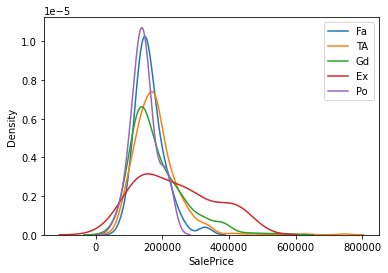

In [190]:
eda('FireplaceQu_imputed')